In [1]:
import pandas as pd

# Load the data
file_path = 'Crop Production data.csv'
crop_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


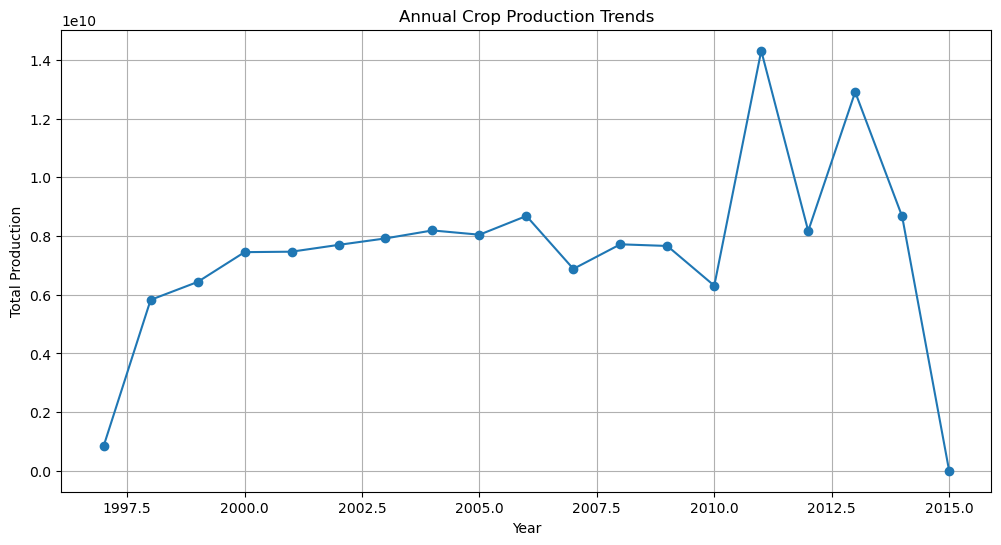

In [26]:
import matplotlib.pyplot as plt

# Group the data by year and sum up the production for each year
annual_production = crop_data.groupby('Crop_Year')['Production'].sum()

# Plotting the annual production trend
plt.figure(figsize=(12, 6))
annual_production.plot(kind='line', marker='o')
plt.title('Annual Crop Production Trends')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.show()


In [2]:
# Aggregate data to sum up area and production for each state
state_wise_summary = crop_data.groupby('State_Name').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Sort the data by production for better visualization
state_wise_summary_sorted = state_wise_summary.sort_values(by='Production', ascending=False)

state_wise_summary_sorted


,State_Name,Area,Production
15,Kerala,3.190807e+07,9.788005e+10
1,Andhra Pradesh,1.315458e+08,1.732459e+10
27,Tamil Nadu,9.589787e+07,1.207644e+10
30,Uttar Pradesh,4.336316e+08,3.234493e+09
3,Assam,7.037876e+07,2.111752e+09
32,West Bengal,2.154052e+08,1.397904e+09
17,Maharashtra,3.222062e+08,1.263641e+09
14,Karnataka,2.029101e+08,8.634298e+08
0,Andaman and Nicobar Islands,3.378961e+05,7.182232e+08
24,Punjab,1.267256e+08,5.863850e+08


In [4]:
# Calculate the number of unique crops grown in each state
crop_diversity_per_state = crop_data.groupby('State_Name')['Crop'].nunique().reset_index().sort_values(by='Crop', ascending=False)
crop_diversity_per_state

,State_Name,Crop
27,Tamil Nadu,87
1,Andhra Pradesh,69
28,Telangana,65
16,Madhya Pradesh,62
14,Karnataka,59
25,Rajasthan,51
15,Kerala,49
21,Nagaland,48
6,Chhattisgarh,46
32,West Bengal,44


In [5]:
# Group the data by State and Crop, then sum the Production for each group
state_crop_production = crop_data.groupby(['State_Name', 'Crop']).agg({'Production': 'sum'}).reset_index()

# Find the crop with the highest production in each state
primary_crop_per_state = state_crop_production.loc[state_crop_production.groupby('State_Name')['Production'].idxmax()]

# Sort the states alphabetically for easier reading
primary_crop_per_state_sorted = primary_crop_per_state.sort_values(by='State_Name').reset_index(drop=True)

primary_crop_per_state_sorted


,State_Name,Crop,Production
0,Andaman and Nicobar Islands,Coconut,7.177900e+08
1,Andhra Pradesh,Coconut,1.680600e+10
2,Arunachal Pradesh,Rice,2.709477e+06
3,Assam,Coconut,1.954408e+09
4,Bihar,Sugarcane,1.062272e+08
5,Chandigarh,Wheat,3.946500e+04
6,Chhattisgarh,Rice,8.149862e+07
7,Dadra and Nagar Haveli,Sugarcane,1.115995e+06
8,Goa,Coconut,5.031126e+08
9,Gujarat,Sugarcane,2.120228e+08


In [6]:
# Group the data by Season and Crop, then sum the Production for each group
season_crop_production = crop_data.groupby(['Season', 'Crop']).agg({'Production': 'sum'}).reset_index()

# Sort the data by Season and then by Production in descending order for better visibility of top crops
season_crop_production_sorted = season_crop_production.sort_values(by=['Season', 'Production'], ascending=[True, False])

# To simplify the visualization, we'll display the top 5 crops by production for each season
top_crops_by_season = season_crop_production_sorted.groupby('Season').head(5)

top_crops_by_season


,Season,Crop,Production
15,Autumn,Rice,5.185376e+07
8,Autumn,Maize,8.933034e+06
11,Autumn,Paddy,2.034745e+06
14,Autumn,Ragi,4.969196e+05
7,Autumn,Jute,4.415599e+05
93,Kharif,Sugarcane,1.774444e+09
84,Kharif,Rice,9.416566e+08
42,Kharif,Cotton(lint),2.816592e+08
62,Kharif,Maize,1.965474e+08
55,Kharif,Jute,1.810813e+08


In [7]:
# Calculate the production per unit area (yield) for each state
state_wise_yield = state_wise_summary.copy()
state_wise_yield['Production_per_Area'] = state_wise_yield['Production'] / state_wise_yield['Area']

# Sort the data by Production_per_Area for better visibility of the most efficient states
state_wise_yield_sorted = state_wise_yield.sort_values(by='Production_per_Area', ascending=False).reset_index(drop=True)

state_wise_yield_sorted


,State_Name,Area,Production,Production_per_Area
0,Kerala,3.190807e+07,9.788005e+10,3067.563634
1,Andaman and Nicobar Islands,3.378961e+05,7.182232e+08,2125.574411
2,Puducherry,5.487420e+05,3.847245e+08,701.102708
3,Goa,1.205680e+06,5.057558e+08,419.477430
4,Andhra Pradesh,1.315458e+08,1.732459e+10,131.700020
5,Tamil Nadu,9.589787e+07,1.207644e+10,125.930257
6,Assam,7.037876e+07,2.111752e+09,30.005528
7,Uttar Pradesh,4.336316e+08,3.234493e+09,7.459079
8,Uttarakhand,1.879318e+07,1.321774e+08,7.033262
9,West Bengal,2.154052e+08,1.397904e+09,6.489649


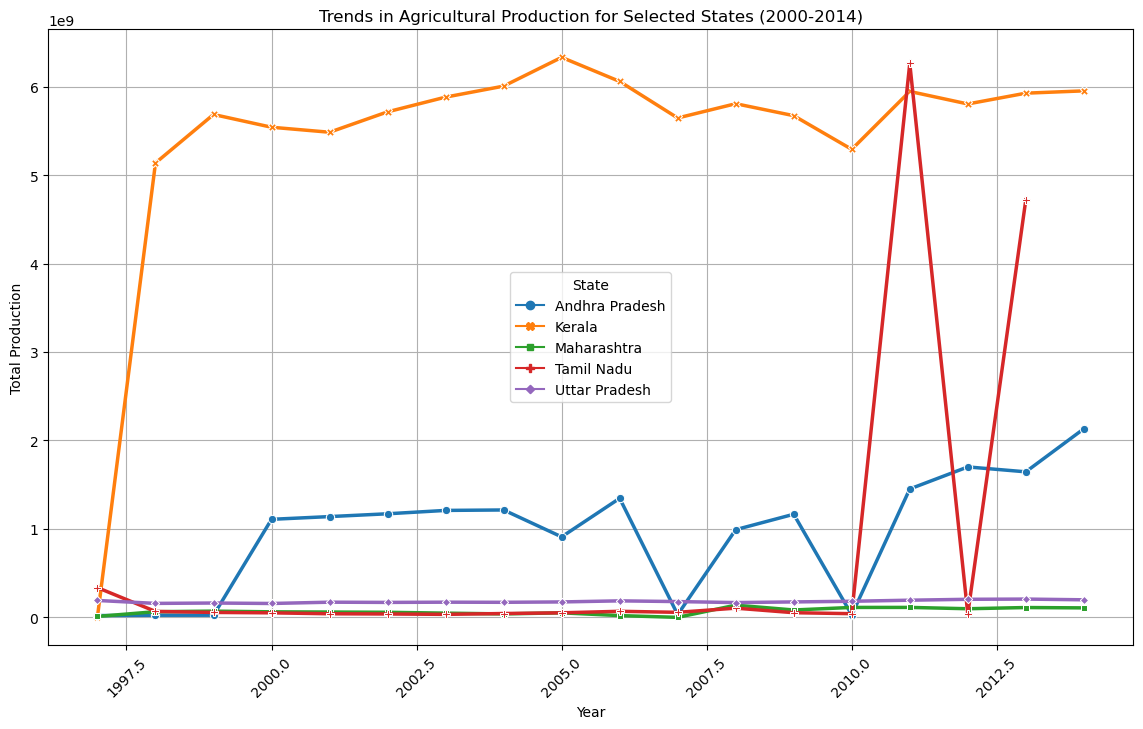

In [13]:
# Filter the dataset for the selected states
selected_states = ['Kerala', 'Andhra Pradesh', 'Tamil Nadu', 'Uttar Pradesh', 'Maharashtra']
filtered_data = crop_data[crop_data['State_Name'].isin(selected_states)]

# Group the data by State and Crop Year, then sum the Production for each group
state_yearly_production = filtered_data.groupby(['State_Name', 'Crop_Year']).agg({'Production': 'sum'}).reset_index()

# Pivot the data to have years as columns and states as rows
state_yearly_production_pivot = state_yearly_production.pivot(index='Crop_Year', columns='State_Name', values='Production')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=state_yearly_production_pivot, dashes=False, markers=True, linewidth=2.5, palette='tab10')

plt.title('Trends in Agricultural Production for Selected States (2000-2014)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [9]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns